## [Taller 3b] Métodos iterativos

Grafique la trayectoria de los siguientes sistemas de ecuaciones

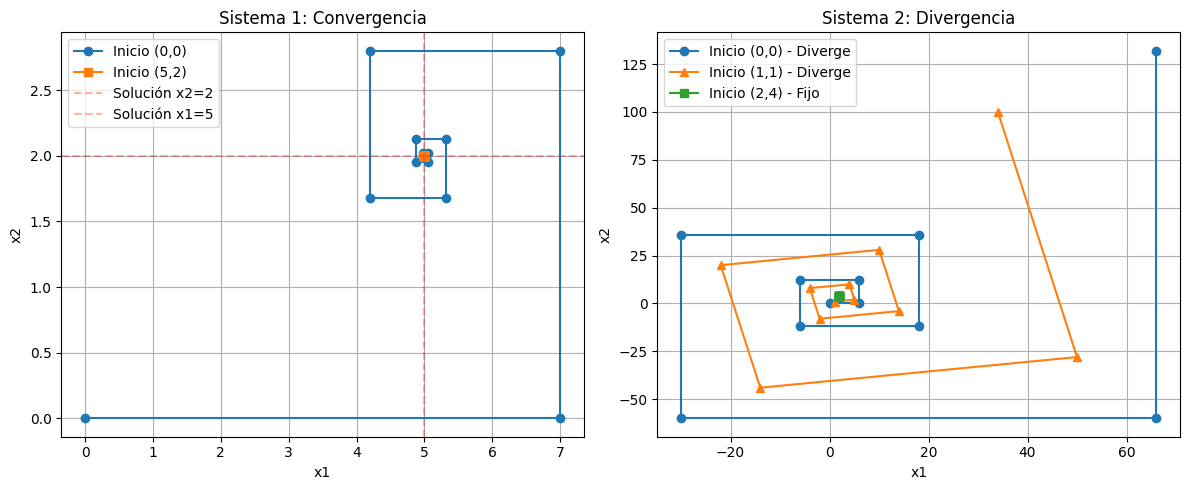

In [1]:
# [Taller 3b] Métodos iterativos

import numpy as np
import matplotlib.pyplot as plt

def jacobi_iteration(A, b, x0, steps=20):
    """
    Calcula la trayectoria de los puntos usando el método de Jacobi.
    x_{k+1} = D^-1 * (b - (A - D) * x_k)
    """
    n = len(b)
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    
    # Extraer la diagonal (D) y la matriz restante (R = A - D)
    D = np.diag(A)
    R = A - np.diag(D)
    
    for _ in range(steps):
        # Fórmula de Jacobi: x = (b - R*x) / D
        x_new = (b - np.dot(R, x)) / D
        x = x_new
        trajectory.append(x.copy())
        
        # Criterio de parada si los valores explotan (divergencia)
        if np.any(np.abs(x) > 1e6):
            break
            
    return np.array(trajectory)

# --- Definición de los Sistemas ---

# Sistema 1: Convergente
# x1 + x2 = 7
# -2x1 + 5x2 = 0
A1 = np.array([[1, 1], [-2, 5]])
b1 = np.array([7, 0])

# Sistema 2: Divergente
# x1 + x2 = 6
# -2x1 + x2 = 0
A2 = np.array([[1, 1], [-2, 1]])
b2 = np.array([6, 0])

# --- Cálculo de Trayectorias ---

# Trayectorias Sistema 1
traj1_a = jacobi_iteration(A1, b1, [0, 0])
traj1_b = jacobi_iteration(A1, b1, [5, 2])

# Trayectorias Sistema 2 (3 posiciones iniciales)
traj2_a = jacobi_iteration(A2, b2, [0, 0], steps=10) # Diverge
traj2_b = jacobi_iteration(A2, b2, [1, 1], steps=10) # Diverge
traj2_c = jacobi_iteration(A2, b2, [2, 4], steps=10) # Punto fijo (solución)

# --- Graficación ---

plt.figure(figsize=(12, 5))

# Plot Sistema 1
plt.subplot(1, 2, 1)
plt.plot(traj1_a[:, 0], traj1_a[:, 1], 'o-', label='Inicio (0,0)')
plt.plot(traj1_b[:, 0], traj1_b[:, 1], 's-', label='Inicio (5,2)')
plt.axhline(2, color='red', linestyle='--', alpha=0.3, label='Solución x2=2')
plt.axvline(5, color='red', linestyle='--', alpha=0.3, label='Solución x1=5')
plt.title('Sistema 1: Convergencia')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)

# Plot Sistema 2
plt.subplot(1, 2, 2)
plt.plot(traj2_a[:, 0], traj2_a[:, 1], 'o-', label='Inicio (0,0) - Diverge')
plt.plot(traj2_b[:, 0], traj2_b[:, 1], '^-', label='Inicio (1,1) - Diverge')
plt.plot(traj2_c[:, 0], traj2_c[:, 1], 's-', label='Inicio (2,4) - Fijo')
plt.title('Sistema 2: Divergencia')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

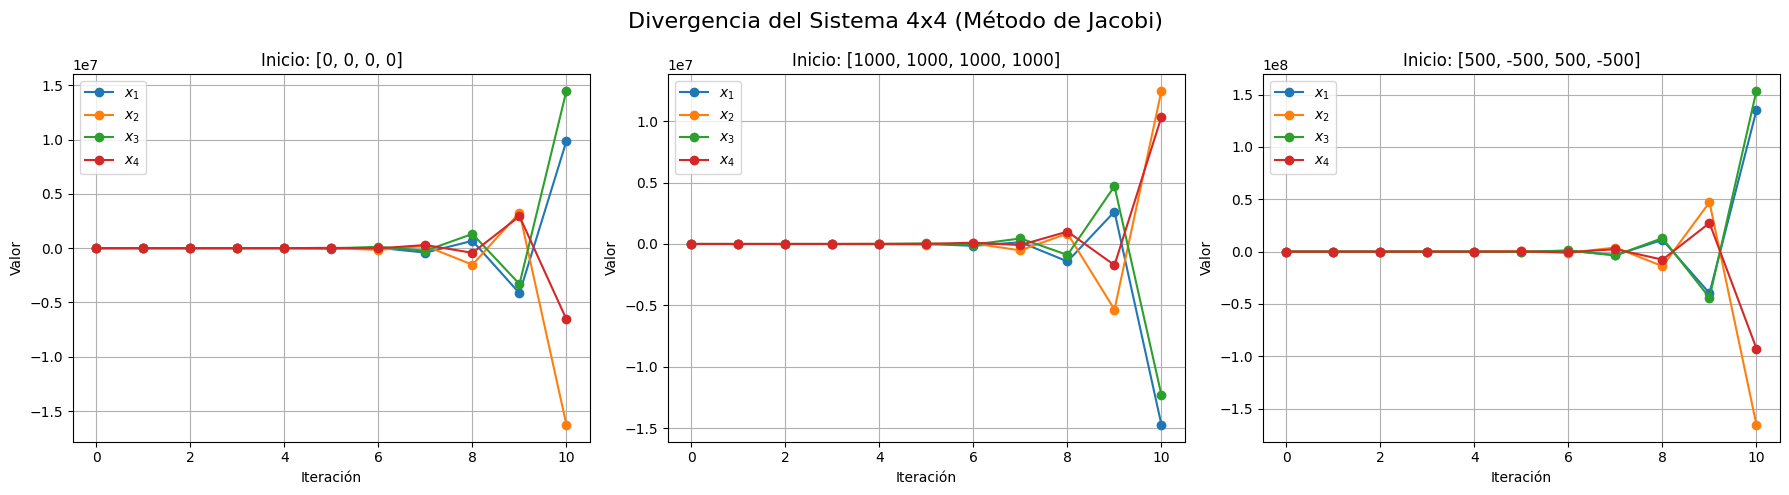

La solución real es: [1200.  980.  570.  640.]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definición del sistema
A = np.array([
    [1, -1, 2, 0],
    [-1, 1, -1, 3],
    [2, -1, 1, -1],
    [0, 3, -1, 2]
], dtype=float)

B = np.array([1360, 1130, 1350, 3650], dtype=float)

def jacobi_iteration(A, b, x0, steps=10):
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    D = np.diag(A)
    R = A - np.diag(D)
    
    for _ in range(steps):
        # Fórmula: x_nueva = (b - (A-D)x) / D
        x = (b - np.dot(R, x)) / D
        trajectory.append(x.copy())
        if np.any(np.abs(x) > 1e10): break # Evitar overflow en el gráfico
    return np.array(trajectory)

# 3 Posiciones iniciales
inicios = [
    [0, 0, 0, 0],
    [1000, 1000, 1000, 1000],
    [500, -500, 500, -500]
]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, x0 in enumerate(inicios):
    traj = jacobi_iteration(A, B, x0)
    iters = np.arange(len(traj))
    for j in range(4):
        axs[i].plot(iters, traj[:, j], marker='o', label=f'$x_{j+1}$')
    
    axs[i].set_title(f'Inicio: {x0}')
    axs[i].set_xlabel('Iteración')
    axs[i].set_ylabel('Valor')
    axs[i].legend()
    axs[i].grid(True)

plt.suptitle('Divergencia del Sistema 4x4 (Método de Jacobi)', fontsize=16)
plt.tight_layout()
plt.show()

# Solución real (usando métodos directos)
sol_real = np.linalg.solve(A, B)
print(f"La solución real es: {sol_real}")

link: https://github.com/RommelRam/Metodos-Numericos.git